In [1]:
from torchsummary import summary
import matplotlib.pyplot as plt
import numpy as np
import cv2
import warnings
warnings.filterwarnings('ignore')
from ultralytics import YOLO

In [2]:
model = YOLO('runs/train/exp76/weights/best.pt')

# 打印模型结构以找到特征层
print(list(model.children()))


[DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
  

In [20]:
feature_maps = []

def hook_fn(module, input, output):
    feature_maps.append(output)

# 注册钩子到模型中的特定层（需要根据实际模型结构调整层数）
layer = model.model.model[10]  # 这里假设第 10 层是我们感兴趣的层
hook = layer.register_forward_hook(hook_fn)

print(layer)
print(hook)

Upsample(scale_factor=2.0, mode=nearest)


In [21]:
img = cv2.imread('/home/lenovo/data/liujiaji/yolov8/powerdata/images/test/2020jishuyanzheng_87038.jpg')
# 运行模型
model(img)

# 取消注册钩子
hook.remove()

feature_map = feature_maps[0].detach().cpu().numpy()
print(feature_map)


0: 384x640 1 pin-uninstall, 12.2ms
Speed: 4.0ms preprocess, 12.2ms inference, 11.7ms postprocess per image at shape (1, 3, 384, 640)
[[[[   -0.23192    -0.23192    -0.23496 ...    -0.24254    -0.23048    -0.23048]
   [   -0.23192    -0.23192    -0.23496 ...    -0.24254    -0.23048    -0.23048]
   [   -0.22817    -0.22817     -0.2291 ...    -0.20715    -0.20235    -0.20235]
   ...
   [   -0.26365    -0.26365    -0.22734 ...    -0.27552    -0.26481    -0.26481]
   [   -0.27829    -0.27829    -0.25876 ...    -0.26948    -0.27015    -0.27015]
   [   -0.27829    -0.27829    -0.25876 ...    -0.26948    -0.27015    -0.27015]]

  [[   -0.25208    -0.25208    -0.25135 ...    -0.26281    -0.26504    -0.26504]
   [   -0.25208    -0.25208    -0.25135 ...    -0.26281    -0.26504    -0.26504]
   [   -0.23991    -0.23991    -0.24222 ...    -0.25187     -0.2568     -0.2568]
   ...
   [   -0.16402    -0.16402    -0.19444 ...    -0.16478     -0.1616     -0.1616]
   [   -0.21112    -0.21112    -0.23933 

(1, 576, 40, 40)
576


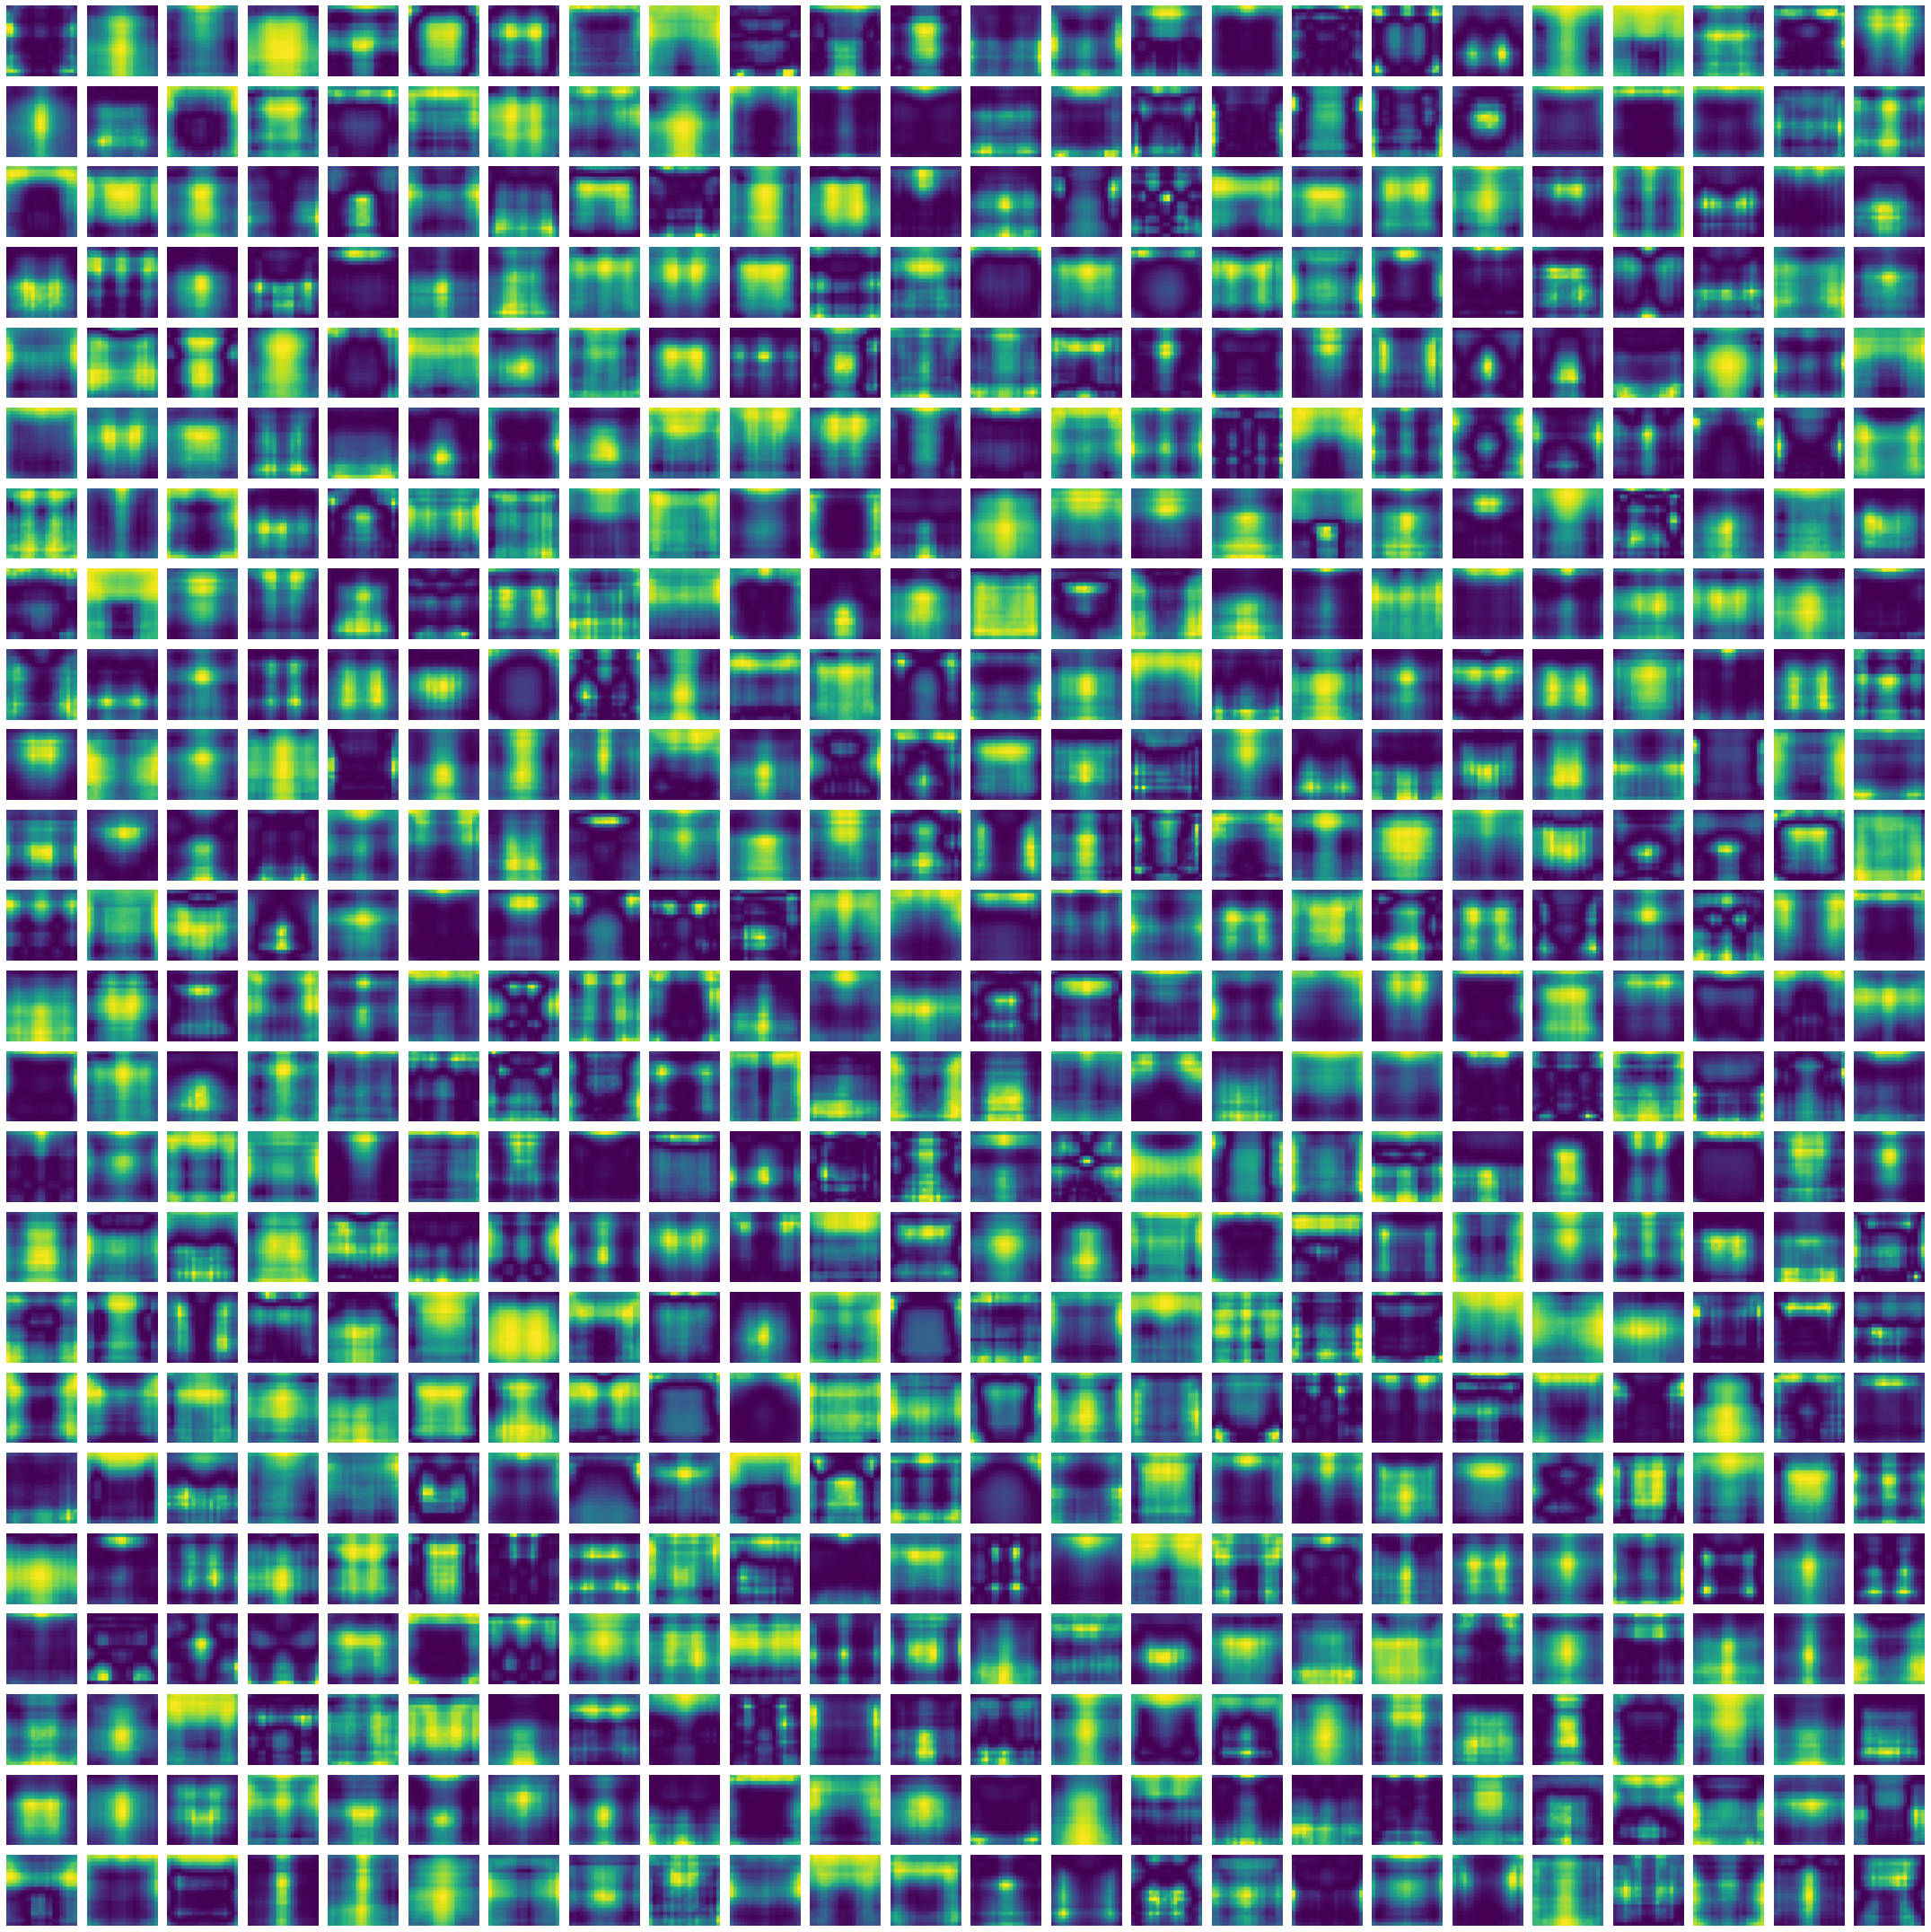

In [17]:
# 可视化特征图函数
def plot_feature_map(feature_map, n_cols=24):
    print(feature_map.shape) # 576
    n_features = feature_map.shape[1]
    print(n_features)
    n_rows = n_features // n_cols 
    
    # 第一个元素为绘图对象Figure，第二个为 n_rows * n_cols 型数组，每个元素为绘图子轴
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 30))

    for i in range(n_rows):
        for j in range(n_cols):
            ax = axes[i, j]
            ax.imshow(feature_map[0, i * n_cols + j], cmap='viridis')
            # ax.set_title('Filter: '+str(ax))
            ax.axis('off') #关闭坐标刻度
    plt.tight_layout()
    plt.show()
    # plt.savefig('/home/lenovo/data/liujiaji/powerGit/yolov8/image/fm.jpg')

# 可视化特征图
plot_feature_map(feature_map)